# Classification with an Academic Success Dataset
## The goal of this competition is to predict academic risk of students in higher education.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [5]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


## Exploratory Data Analysis

**Let's explore the data!**

**Check for Missing Data Visually**

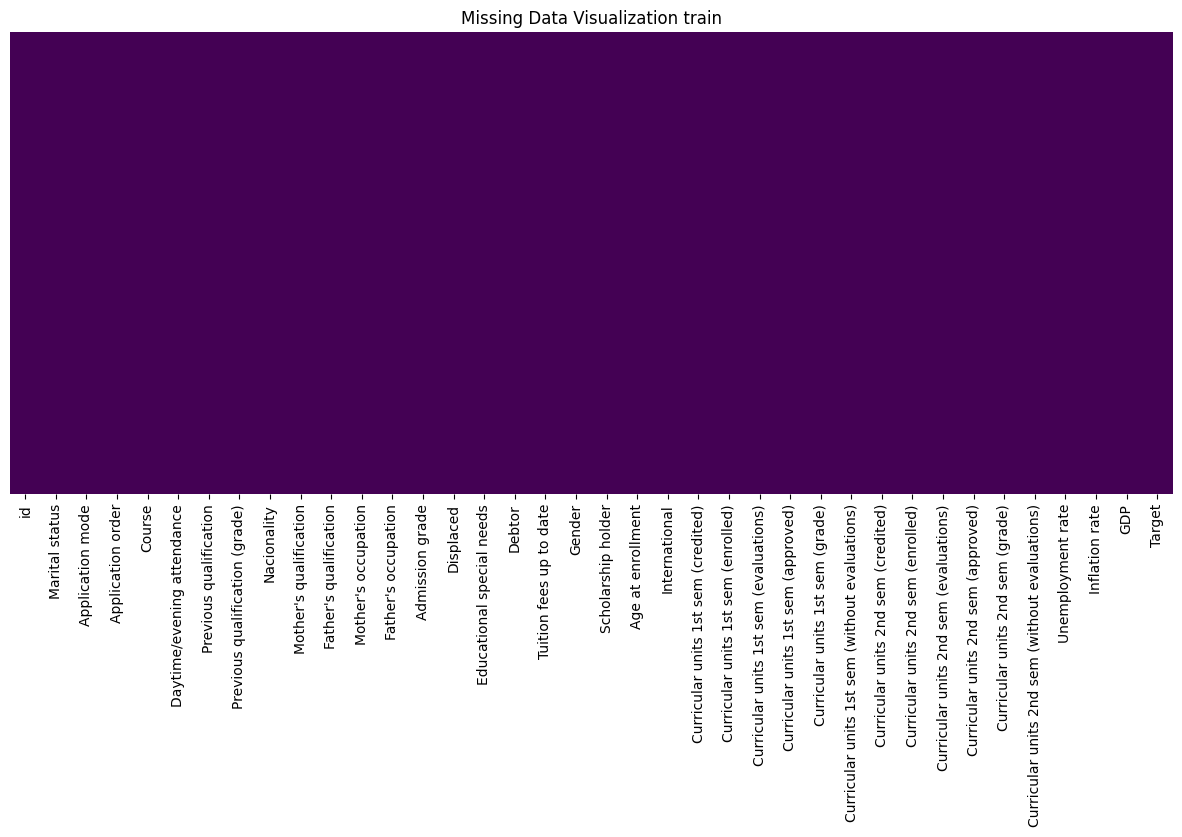

In [6]:
plt.figure(figsize=(15, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization train')
plt.show()

**Check For Duplicates**

In [7]:
train.duplicated().sum()

0

**Barplot showing a count for each class**

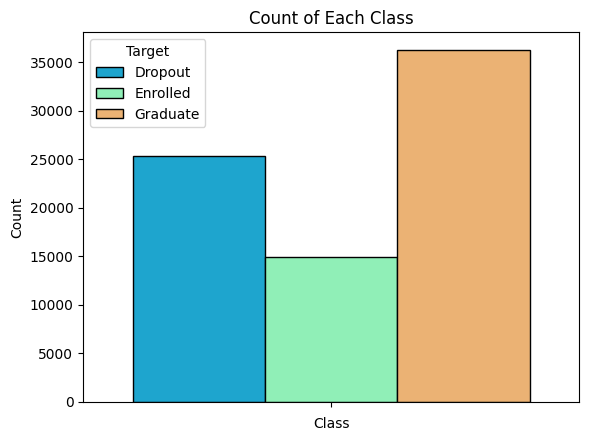

In [8]:
class_counts = train['Target'].value_counts().sort_index()
sns.barplot(hue=class_counts.index, y=class_counts.values, palette='rainbow', edgecolor='black')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Pie showing the distribution of each class**

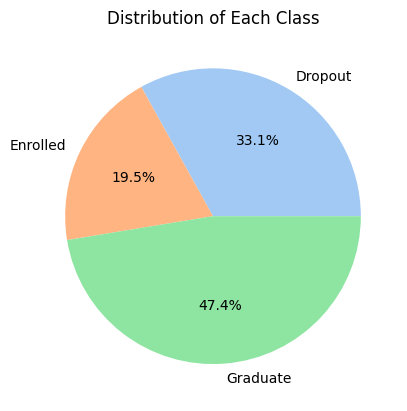

In [9]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Each Class')
plt.show()

**Compare All Data to the Target to Further See how to Build the Model**

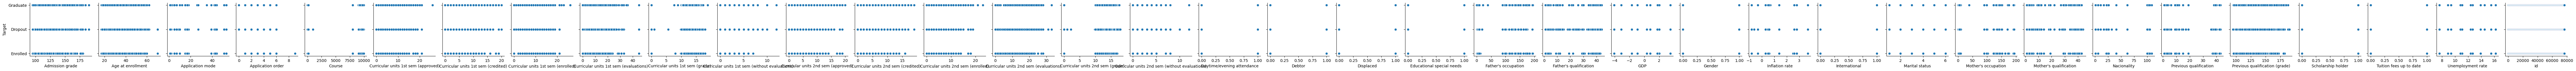

In [10]:
target_variable = 'Target'
features = train.columns.difference([target_variable])
sns.pairplot(train, x_vars=features, y_vars=target_variable)
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = train.drop(['Previous qualification', 'Mother\'s qualification', 'Father\'s qualification','Mother\'s occupation', 'Father\'s occupation', 'Course', 'Application order', 'Application mode', 'id', 'Target'], axis=1)
y = train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Correlation Matrix Visual**

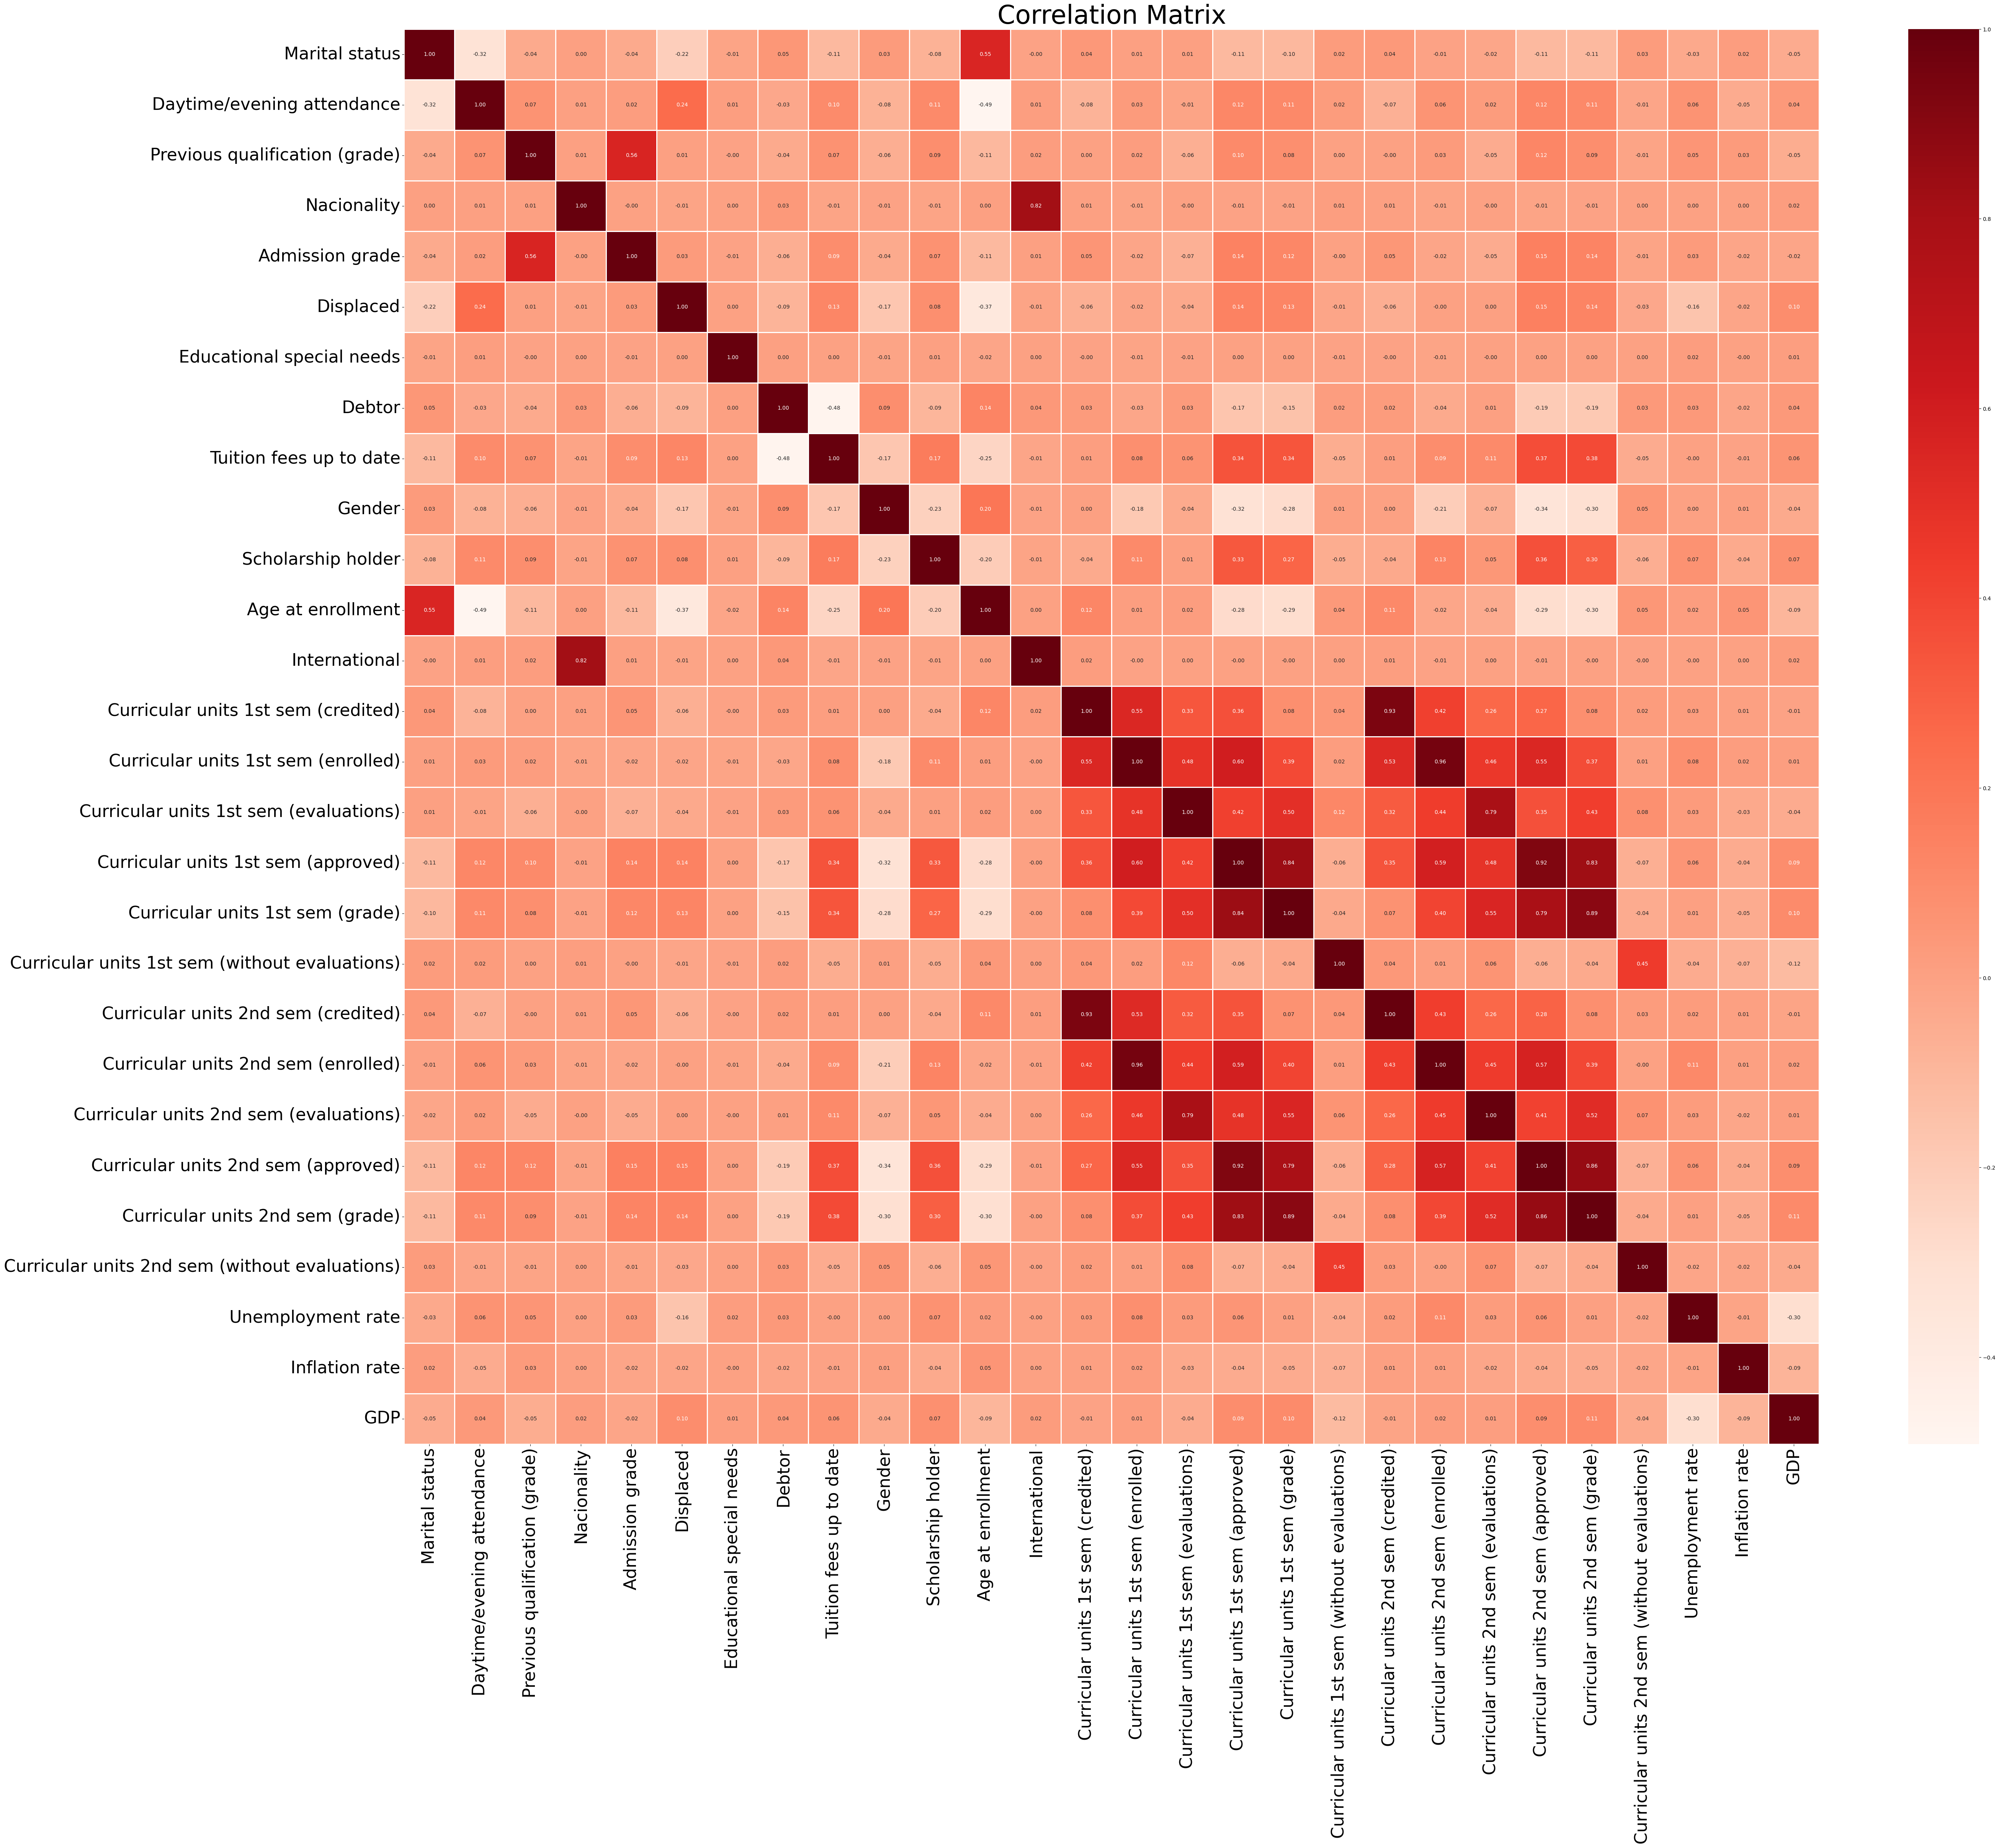

In [13]:
correlation_matrix = X.corr()
plt.figure(figsize=(60, 48))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=2, square=True)
plt.title('Correlation Matrix', fontsize=48)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.show()

## Training the Model

Now its time to train our model on our training data!

**We import RandomForestClassifier from sklearn.ensemble**

In [14]:
from sklearn.ensemble import RandomForestClassifier

**Created an instance of a RandomForestClassifier() model named rfc.**

In [15]:
rfc = RandomForestClassifier(n_estimators=100)

**Fit rfc on the training data.**

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**We use rfc.predict() to predict off the X_test set of the data.**

In [17]:
rfc_predictions = rfc.predict(X_test)

## Evaluating the Model

Let's evaluate our model performance by using a classification report and a confusion matrix.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[ 6180   852   546]
 [  598  2615  1209]
 [  165   743 10048]]
              precision    recall  f1-score   support

     Dropout       0.89      0.82      0.85      7578
    Enrolled       0.62      0.59      0.61      4422
    Graduate       0.85      0.92      0.88     10956

    accuracy                           0.82     22956
   macro avg       0.79      0.77      0.78     22956
weighted avg       0.82      0.82      0.82     22956



## Now we Test Our Model on the Real "test" Data.

**Import the test data and save the original id's.**

In [20]:
test = pd.read_csv('test.csv')
original_test_ids = test['id'].copy()

In [21]:
test = test.drop(['Previous qualification', 'Mother\'s qualification', 'Father\'s qualification','Mother\'s occupation', 'Father\'s occupation', 'Course', 'Application order', 'Application mode', 'id'], axis=1)

**Run the predictions on the test data**

In [22]:
test_predictions = rfc.predict(test)

**Create the submission  format and save a CSV with the data for submission.**

In [24]:
submission = pd.DataFrame({
    'id' : original_test_ids,
    'Target' : test_predictions})
submission.to_csv('RF_predictions_playground_series_s4e6.csv', index=False)